# **Data merging**

In [ ]:
import  os
import pandas as pd
directory = '/content/DS'

files = os.listdir(directory)

csv_files = [f for f in files if f.endswith('.csv')]

dfs = []
for csv_file in csv_files:
    file_path = os.path.join(directory, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

In [ ]:
# df.to_csv(directory+'dataset(v1).csv', index=False)

# **Data pre-processing**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.cluster import DBSCAN
import numpy as np
from datetime import datetime, timedelta
import pytz
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/DSdataset(v1).csv')

In [ ]:
df.shape

(33652, 9)

In [ ]:
df

,road_name,distance_km,duration_in_traffic_min,speed_kmh,delay_min,traffic_condition,timestamp,start_point,end_point
0,Al Nadwah,10.482,19.833333,31.710252,-0.633333,Blue,2024-09-30T08:00:30.203951,"(24.8334879, 46.92008999999999)","(24.7888572, 46.8588979)"
1,Al Nadwah,2.397,5.933333,24.239326,-1.050000,Blue,2024-09-30T08:00:30.319375,"(24.7888572, 46.8588979)","(24.7743639, 46.8608065)"
2,King Abdul Aziz Road,12.235,19.216667,38.201214,-0.683333,Blue,2024-09-30T08:00:30.416947,"(24.999486, 46.72798419999999)","(24.9286095, 46.7150481)"
3,King Abdul Aziz Road,24.132,16.650000,86.962162,-1.600000,Blue,2024-09-30T08:00:30.521602,"(24.9286095, 46.7150481)","(24.796827, 46.5643251)"
4,King Abdul Aziz Road,17.492,11.516667,91.130535,-0.766667,Blue,2024-09-30T08:00:30.621160,"(24.796827, 46.5643251)","(24.6575642, 46.5630617)"
...,...,...,...,...,...,...,...,...,...
33647,Sabta,7.146,7.116667,60.247307,-1.200000,Blue,2024-09-28T04:00:44.784577,"(24.7648682, 46.6698285)","(24.7234426, 46.6544716)"
33648,Al Rafaih,7.562,11.716667,38.724324,-1.833333,Blue,2024-09-28T04:00:44.878954,"(24.6504677, 46.6764176)","(24.6265686, 46.6444919)"
33649,ممر الجوابرة,7.179,10.733333,40.131056,-2.033333,Blue,2024-09-28T04:00:44.958368,"(24.7358603, 46.6683299)","(24.7033843, 46.6339255)"
33650,الباطن,15.688,13.400000,70.244776,-2.833333,Blue,2024-09-28T04:00:45.036930,"(24.7629735, 46.8026235)","(24.6705, 46.7815592)"


In [ ]:
# Convert the 'timestamp' column to datetime objects first
df['timestamp'] = pd.to_datetime(df['timestamp'])
# Now you can add the timedelta

df['timestamp'] = pd.to_datetime(df['timestamp'] + timedelta(hours=3))

In [ ]:
df['timestamp'].sort_values()

,timestamp
28461,2024-09-22 21:00:30.129180
28462,2024-09-22 21:00:30.258433
28463,2024-09-22 21:00:30.379657
28464,2024-09-22 21:00:30.488185
28465,2024-09-22 21:00:30.584245
...,...
28277,2024-09-30 16:00:48.563975
28278,2024-09-30 16:00:48.643142
28279,2024-09-30 16:00:48.738335
28280,2024-09-30 16:00:48.843745


In [ ]:
df['timestamp'].tail()

,timestamp
33647,2024-09-28 07:00:44.784577
33648,2024-09-28 07:00:44.878954
33649,2024-09-28 07:00:44.958368
33650,2024-09-28 07:00:45.036930
33651,2024-09-28 07:00:45.126139


In [ ]:
df = df[df['delay_min'] > 0]

In [ ]:
df['distance_km'].min()

1.659

In [ ]:
df = df[df['distance_km'] >= 10]

In [ ]:
df['distance_km'].min()

10.003

In [ ]:
#  Convert the 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

#  Extract the hour from the 'timestamp' column to identify the hour of congestion
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month

# # Feature engineering: create a new column for congestion ratio
# # Calculate the congestion ratio as (delay_min / distance_km)
df['congestion_ratio'] = df['delay_min'] / df['distance_km']
df['distance_ratio'] = df['duration_in_traffic_min'] / df['distance_km']
# # Select relevant columns: road_name, distance_km, delay_min, congestion_ratio, hour, and other details
congestion_info = df[['road_name', 'distance_km', 'delay_min', 'congestion_ratio','distance_ratio', 'hour','day','month', 'traffic_condition', 'timestamp', 'start_point', 'end_point']]

# # Display the top 10 most congested roads based on the congestion ratio
congestion_info.head(20)

,road_name,distance_km,delay_min,congestion_ratio,distance_ratio,hour,day,month,traffic_condition,timestamp,start_point,end_point
13,العزايزه,11.967,2.333333,0.194981,1.643408,11,30,9,Yellow,2024-09-30 11:00:31.414840,"(24.6131743, 46.8134172)","(24.5881304, 46.7601929)"
17,بنها,13.740,0.383333,0.027899,1.068656,11,30,9,Blue,2024-09-30 11:00:31.804419,"(24.6113886, 46.8379204)","(24.5988688, 46.8215)"
28,Northern Ring Road,55.002,2.883333,0.052422,0.784820,11,30,9,Yellow,2024-09-30 11:00:32.921205,"(24.954535, 47.0142416)","(24.7258606, 46.583506)"
30,Jeddah Road,21.325,0.250000,0.011723,0.695584,11,30,9,Blue,2024-09-30 11:00:33.105439,"(24.5267888, 46.438767)","(24.5263866, 46.43865479999999)"
41,Al Janadriyah,11.016,0.166667,0.015130,0.754962,11,30,9,Blue,2024-09-30 11:00:34.041639,"(24.9446738, 46.99754)","(24.9458889, 47.00449709999999)"
45,Olaya Road,15.566,2.300000,0.147758,1.020386,11,30,9,Yellow,2024-09-30 11:00:34.348298,"(24.7970264, 46.719939)","(24.7388275, 46.59441409999999)"
46,Olaya Road,11.688,2.366667,0.202487,1.055213,11,30,9,Orange,2024-09-30 11:00:34.435998,"(24.7388275, 46.59441409999999)","(24.6714694, 46.6223696)"
49,Airport Road,11.895,2.533333,0.212975,1.133529,11,30,9,Orange,2024-09-30 11:00:34.694294,"(24.8315628, 46.7228638)","(24.7686837, 46.6651902)"
51,East Ring Road,17.745,5.583333,0.314643,1.355311,11,30,9,Orange,2024-09-30 11:00:34.888530,"(24.7921779, 46.8058943)","(24.7298106, 46.6686894)"
52,East Ring Road,12.602,4.000000,0.317410,1.358250,11,30,9,Orange,2024-09-30 11:00:34.970983,"(24.7298106, 46.6686894)","(24.6280957, 46.7049403)"


In [ ]:
df['day'].value_counts()

,count
day,
26,1031
29,892
25,878
24,781
23,575
30,563
28,477
27,393
22,179


In [ ]:
# Filter out rows where 'day' is 22
df = df[df['day'] != 22]

# Verify that rows with day 22 are removed
df['day'].value_counts()

,count
day,
26,1031
29,892
25,878
24,781
23,575
30,563
28,477
27,393


In [ ]:
df['day'].value_counts()

,count
day,
26,1031
29,892
25,878
24,781
23,575
30,563
28,477
27,393


In [ ]:
df['distance_km'].max()

67.881

In [ ]:
df[df['distance_km'] >=  40]

,road_name,distance_km,duration_in_traffic_min,speed_kmh,delay_min,traffic_condition,timestamp,start_point,end_point,hour,day,month,congestion_ratio,distance_ratio
28,Northern Ring Road,55.002,43.166667,76.450656,2.883333,Yellow,2024-09-30 11:00:32.921205,"(24.954535, 47.0142416)","(24.7258606, 46.583506)",11,30,9,0.052422,0.784820
744,Northern Ring Road,55.002,61.266667,53.864853,20.983333,Red,2024-09-26 14:00:33.155432,"(24.954535, 47.0142416)","(24.7258606, 46.583506)",14,26,9,0.381501,1.113899
923,Northern Ring Road,55.002,44.133333,74.776133,3.850000,Yellow,2024-09-24 16:00:32.592385,"(24.954535, 47.0142416)","(24.7258606, 46.583506)",16,24,9,0.069997,0.802395
1281,Northern Ring Road,55.002,40.366667,81.753592,0.083333,Blue,2024-09-29 18:00:33.569090,"(24.954535, 47.0142416)","(24.7258606, 46.583506)",18,29,9,0.001515,0.733913
1639,Northern Ring Road,56.705,48.150000,70.660436,1.316667,Blue,2024-09-23 02:00:32.412591,"(24.954535, 47.0142416)","(24.7258606, 46.583506)",2,23,9,0.023220,0.849131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32427,Northern Ring Road,55.002,47.866667,68.944011,7.583333,Yellow,2024-09-30 14:00:33.484060,"(24.954535, 47.0142416)","(24.7258606, 46.583506)",14,30,9,0.137874,0.870271
32964,Northern Ring Road,55.002,42.383333,77.863626,2.100000,Yellow,2024-09-23 16:00:33.414028,"(24.954535, 47.0142416)","(24.7258606, 46.583506)",16,23,9,0.038180,0.770578
33143,Northern Ring Road,55.002,44.133333,74.776133,3.850000,Yellow,2024-09-27 21:00:33.156008,"(24.954535, 47.0142416)","(24.7258606, 46.583506)",21,27,9,0.069997,0.802395
33322,Northern Ring Road,55.002,43.266667,76.273960,2.983333,Yellow,2024-09-28 17:00:33.324643,"(24.954535, 47.0142416)","(24.7258606, 46.583506)",17,28,9,0.054240,0.786638


In [ ]:
df.loc[df['distance_km'] <= 40]

,road_name,distance_km,duration_in_traffic_min,speed_kmh,delay_min,traffic_condition,timestamp,start_point,end_point,hour,day,month,congestion_ratio,distance_ratio
13,العزايزه,11.967,19.666667,36.509492,2.333333,Yellow,2024-09-30 11:00:31.414840,"(24.6131743, 46.8134172)","(24.5881304, 46.7601929)",11,30,9,0.194981,1.643408
17,بنها,13.740,14.683333,56.145289,0.383333,Blue,2024-09-30 11:00:31.804419,"(24.6113886, 46.8379204)","(24.5988688, 46.8215)",11,30,9,0.027899,1.068656
30,Jeddah Road,21.325,14.833333,86.258427,0.250000,Blue,2024-09-30 11:00:33.105439,"(24.5267888, 46.438767)","(24.5263866, 46.43865479999999)",11,30,9,0.011723,0.695584
41,Al Janadriyah,11.016,8.316667,79.474148,0.166667,Blue,2024-09-30 11:00:34.041639,"(24.9446738, 46.99754)","(24.9458889, 47.00449709999999)",11,30,9,0.015130,0.754962
45,Olaya Road,15.566,15.883333,58.801259,2.300000,Yellow,2024-09-30 11:00:34.348298,"(24.7970264, 46.719939)","(24.7388275, 46.59441409999999)",11,30,9,0.147758,1.020386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33508,Khurais Road,19.113,11.850000,96.774684,0.016667,Blue,2024-09-28 07:00:32.995945,"(24.9451257, 47.0000027)","(24.8457928, 46.8565916)",7,28,9,0.000872,0.619997
33514,Al Janadriyah,11.016,8.200000,80.604878,0.050000,Blue,2024-09-28 07:00:33.454511,"(24.9446738, 46.99754)","(24.9458889, 47.00449709999999)",7,28,9,0.004539,0.744372
33515,Al Janadriyah,19.575,12.183333,96.402189,0.033333,Blue,2024-09-28 07:00:33.492649,"(24.9458889, 47.00449709999999)","(24.8457928, 46.8565916)",7,28,9,0.001703,0.622393
33576,Yanbu,13.647,17.100000,47.884211,0.183333,Blue,2024-09-28 07:00:38.716120,"(24.649823, 46.5868484)","(24.59217, 46.50841390000001)",7,28,9,0.013434,1.253023


In [ ]:
import pandas as pd

# Perform groupby with two columns ('start_point', 'end_point') and aggregate the mean of the specified columns
aggregation_result = df.groupby(['road_name','start_point', 'end_point']).agg({
    'distance_km': 'mean',
    'duration_in_traffic_min': 'mean',
    'delay_min': 'mean',
    'congestion_ratio': 'mean'
}).reset_index()

# For 'traffic_condition', apply mode (most frequent value)
traffic_condition_mode = df.groupby(['start_point', 'end_point'])['traffic_condition'].agg(lambda x: x.mode()[0]).reset_index()

# Merge the mode of 'traffic_condition' back into the aggregation result
aggregation_result = pd.merge(aggregation_result, traffic_condition_mode, on=['start_point', 'end_point'])

ag_df = aggregation_result

# clusters_1

In [ ]:
# Use both 'congestion_ratio' and 'distance_km' for clustering
features = df[['congestion_ratio']]

# Use MinMaxScaler to scale both 'congestion_ratio' and 'distance_km'
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-Means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)

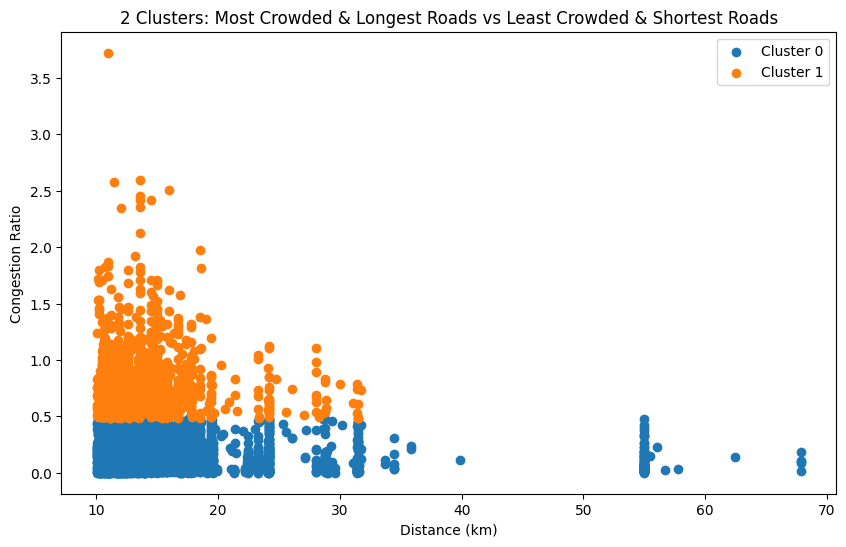

In [ ]:
# Plot the clusters
plt.figure(figsize=(10, 6))

# Plot each cluster with different colors
for cluster in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['distance_km'], cluster_data['congestion_ratio'], label=f'Cluster {cluster}')

# Add labels and title
plt.xlabel('Distance (km)')
plt.ylabel('Congestion Ratio')
plt.title('2 Clusters: Most Crowded & Longest Roads vs Least Crowded & Shortest Roads')
plt.legend()

# Show the plot
plt.show()

# clusters_2


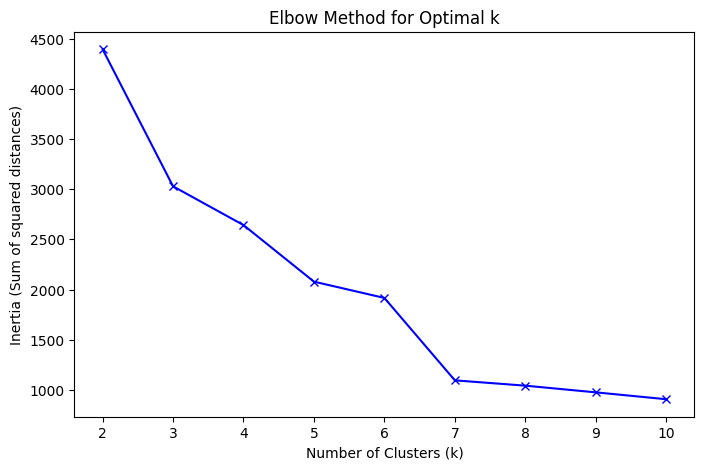

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Prepare the features for clustering from the aggregation_result (excluding non-numeric columns)
features = aggregation_result[['distance_km', 'duration_in_traffic_min', 'delay_min', 'congestion_ratio']]

# Use the Elbow Method to find the optimal number of clusters
inertia = []
K = range(2, 11)  # Test between 1 and 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)  # Inertia: Sum of squared distances to the closest cluster center

# Plot the Elbow Method results
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
# Prepare the features for clustering (select numeric columns)
features = ag_df[['distance_km', 'duration_in_traffic_min', 'delay_min', 'congestion_ratio']]

# Use MinMaxScaler to scale the features for fair clustering
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
ag_df['cluster'] = kmeans.fit_predict(features_scaled)

# Display the first few rows with cluster labels
ag_df[['road_name', 'start_point', 'end_point', 'cluster']]


,road_name,start_point,end_point,cluster
0,AL Hadad,"(24.6927651, 46.7943949)","(24.6395493, 46.7947988)",0
1,Abi Hasain Al Hanbali,"(24.8021898, 46.66384100000001)","(24.7835076, 46.6237006)",0
2,Airport Road,"(24.8315628, 46.7228638)","(24.7686837, 46.6651902)",1
3,Airport Road,"(24.9286095, 46.7150481)","(24.8315628, 46.7228638)",0
4,Airport Road,"(24.993577, 46.7319439)","(24.9286095, 46.7150481)",0
...,...,...,...,...
109,ممر النظيم,"(24.9526915, 47.0585479)","(24.7888572, 46.8588979)",3
110,ممر قرطبة,"(24.8375078, 46.7583126)","(24.7921872, 46.7123915)",0
111,وادي درعة,"(24.662828, 46.8265171)","(24.6354831, 46.7687661)",0
112,وادي لبن,"(24.6413405, 46.6497779)","(24.6171257, 46.5705705)",0


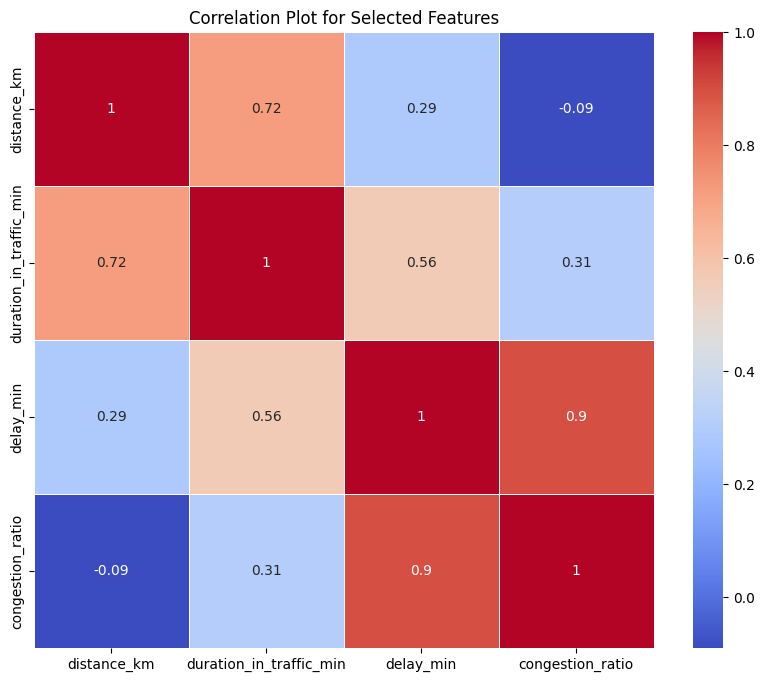

In [ ]:
# Create a correlation plot for the selected features
import seaborn as sns
plt.figure(figsize=(10, 8))
correlation_matrix = aggregation_result[['distance_km', 'duration_in_traffic_min', 'delay_min', 'congestion_ratio']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot for Selected Features')
plt.show()


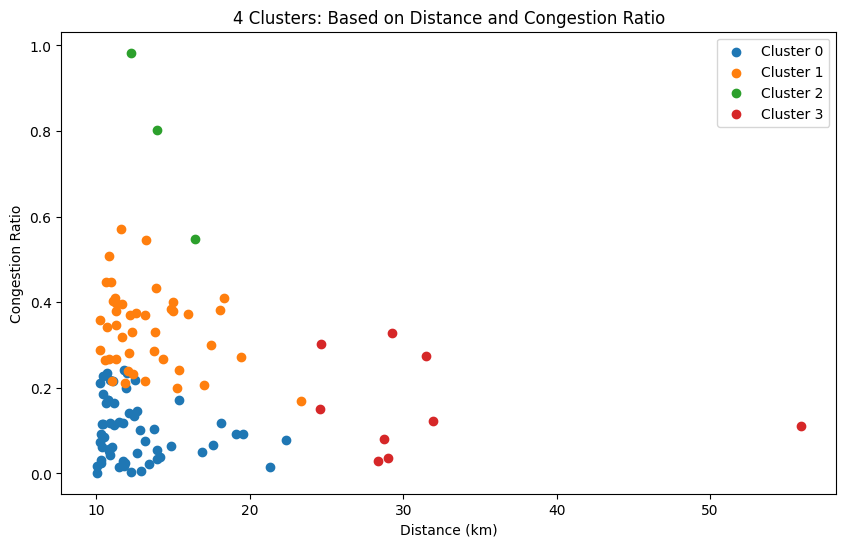

In [ ]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(10, 6))

# Plot each cluster with different colors
for cluster in ag_df['cluster'].unique():
    cluster_data = ag_df[ag_df['cluster'] == cluster]
    plt.scatter(cluster_data['distance_km'], cluster_data['congestion_ratio'], label=f'Cluster {cluster}')

# Add labels and title
plt.xlabel('Distance (km)')
plt.ylabel('Congestion Ratio')
plt.title('4 Clusters: Based on Distance and Congestion Ratio')
plt.legend()

# Show the plot
plt.show()


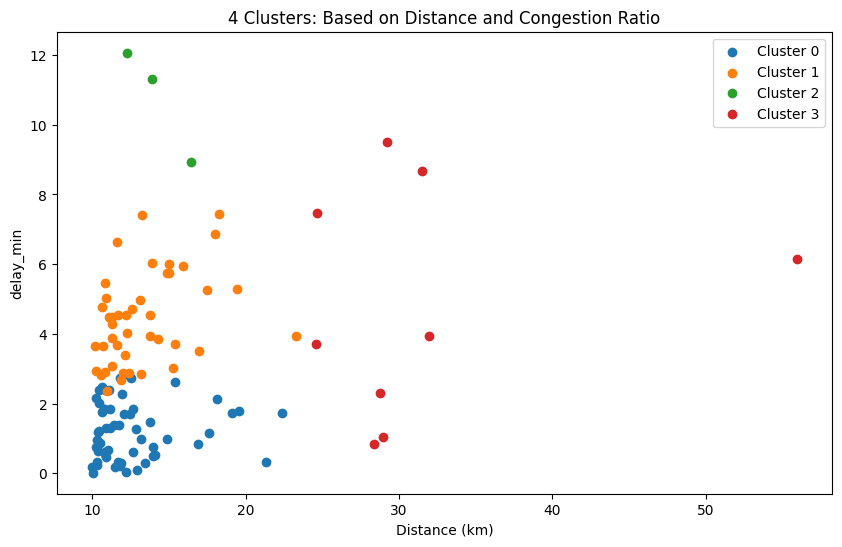

In [ ]:
# Plot the clusters
plt.figure(figsize=(10, 6))

# Plot each cluster with different colors
for cluster in ag_df['cluster'].unique():
    cluster_data = ag_df[ag_df['cluster'] == cluster]
    plt.scatter(cluster_data['distance_km'], cluster_data['delay_min'], label=f'Cluster {cluster}')

# Add labels and title
plt.xlabel('Distance (km)')
plt.ylabel('delay_min')
plt.title('4 Clusters: Based on Distance and Congestion Ratio')
plt.legend()

# Show the plot
plt.show()

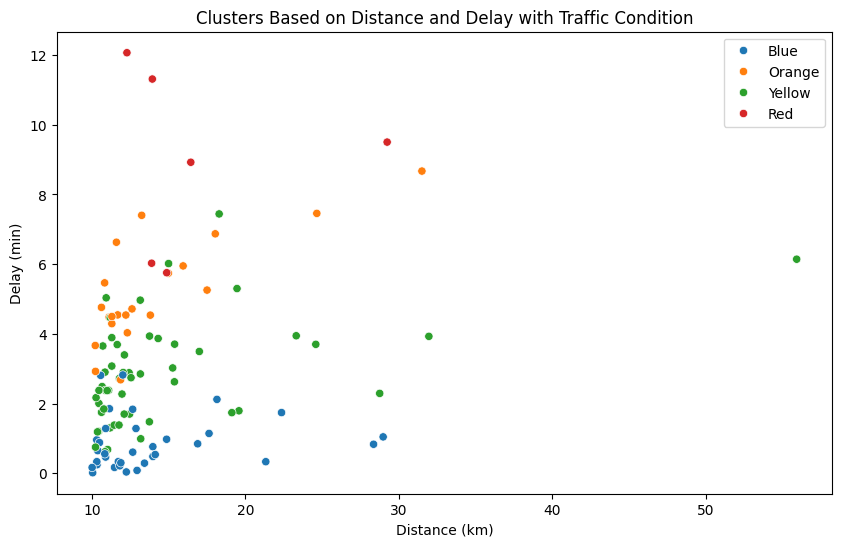

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # import seaborn

# Plot the clusters
plt.figure(figsize=(10, 6))

# Plot each cluster with different colors
# Use seaborn scatterplot for hue functionality
sns.scatterplot(x=ag_df['distance_km'], y=ag_df['delay_min'], hue=ag_df['traffic_condition'])

# Add labels and title
plt.xlabel('Distance (km)')
plt.ylabel('Delay (min)') # changed to delay min
plt.title('Clusters Based on Distance and Delay with Traffic Condition') # changed the title to be more descriptive
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Display each cluster with its rows to observe the differences between clusters
cluster_data_0 = ag_df[ag_df['cluster'] == 0]
pd.set_option('display.max_rows', None)
display(cluster_data_0)

,road_name,start_point,end_point,distance_km,duration_in_traffic_min,delay_min,congestion_ratio,traffic_condition,cluster
0,AL Hadad,"(24.6927651, 46.7943949)","(24.6395493, 46.7947988)",10.306000,14.126190,0.959524,0.093103,Blue,0
1,Abi Hasain Al Hanbali,"(24.8021898, 46.66384100000001)","(24.7835076, 46.6237006)",10.043000,17.633333,0.016667,0.001660,Blue,0
3,Airport Road,"(24.9286095, 46.7150481)","(24.8315628, 46.7228638)",13.174000,11.673810,0.990476,0.075184,Yellow,0
4,Airport Road,"(24.993577, 46.7319439)","(24.9286095, 46.7150481)",11.465000,18.852381,0.169048,0.014745,Blue,0
8,Al Falah,"(24.8092115, 46.7223044)","(24.7850233, 46.6956247)",11.172211,18.099123,1.303509,0.114224,Yellow,0
9,Al Ghareeb,"(24.7235126, 46.7900656)","(24.6781918, 46.7491328)",10.431386,17.225146,1.201754,0.114590,Yellow,0
11,Al Janadriyah,"(24.9446738, 46.99754)","(24.9458889, 47.00449709999999)",11.016000,8.831356,0.681356,0.061851,Yellow,0
12,Al Janadriyah,"(24.9458889, 47.00449709999999)","(24.8457928, 46.8565916)",19.575000,13.943103,1.793103,0.091602,Yellow,0
13,Al Khozama,"(24.7363697, 46.6231491)","(24.6855349, 46.575724)",12.863882,17.008333,1.284804,0.101356,Blue,0
15,Al Nadwah,"(24.8334879, 46.92008999999999)","(24.7888572, 46.8588979)",10.485255,21.356028,0.881915,0.084109,Blue,0


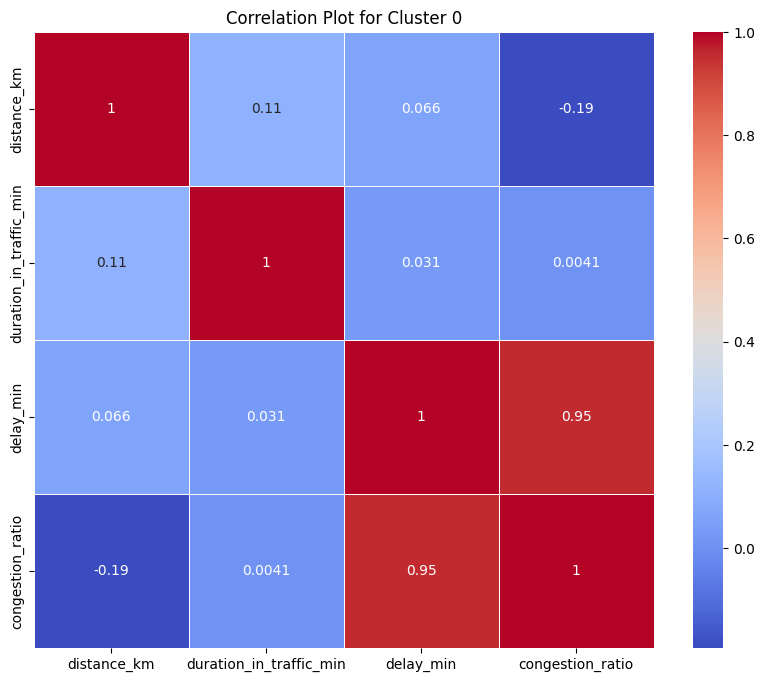

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for cluster 0
cluster_data_0 = aggregation_result[aggregation_result['cluster'] == 0]

# Select numeric features for correlation
features_cluster_0 = cluster_data_0[['distance_km', 'duration_in_traffic_min', 'delay_min', 'congestion_ratio']]

# Create a correlation plot for cluster 0
plt.figure(figsize=(10, 8))
correlation_matrix_cluster_0 = features_cluster_0.corr()

sns.heatmap(correlation_matrix_cluster_0, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot for Cluster 0')
plt.show()


In [ ]:
features_cluster_0.describe()

,distance_km,duration_in_traffic_min,delay_min,congestion_ratio
count,58.000000,58.000000,58.000000,58.000000
mean,12.576215,15.754152,1.239272,0.101789
std,2.877447,3.122497,0.817561,0.071081
min,10.006000,8.831356,0.016667,0.001660
25%,10.684239,13.937891,0.543260,0.044144
50%,11.734637,15.934684,1.195574,0.091326
75%,13.114000,17.516135,1.842288,0.159291
max,22.351400,23.201250,2.821354,0.242017


In [ ]:
cluster_data_0.shape

(58, 9)

In [ ]:
# Display each cluster with its rows to observe the differences between clusters
cluster_data_1= ag_df[ag_df['cluster'] == 1]
display(cluster_data_1)

,road_name,start_point,end_point,distance_km,duration_in_traffic_min,delay_min,congestion_ratio,traffic_condition,cluster
2,Airport Road,"(24.8315628, 46.7228638)","(24.7686837, 46.6651902)",11.111926,13.654610,4.479965,0.402131,Orange,1
5,Aka,"(24.693558, 46.831367)","(24.6560904, 46.7588861)",10.843000,19.351961,2.901961,0.267634,Yellow,1
6,Al Abbas Al Rashidi St.,"(24.632121, 46.8075755)","(24.5901945, 46.7873646)",11.186433,18.176111,4.465000,0.410242,Yellow,1
7,Al Abbas Al Rashidi St.,"(24.6923553, 46.84949959999999)","(24.632121, 46.8075755)",10.560143,14.789881,2.810119,0.266101,Blue,1
10,Al Jabour,"(24.6443403, 46.7653899)","(24.6118611, 46.7158466)",12.300111,26.801852,4.031481,0.330664,Orange,1
14,Al Muhareb,"(24.6432381, 46.7284768)","(24.5853478, 46.7106843)",11.588122,23.522523,6.629505,0.571949,Orange,1
18,Al Naqeel,"(24.7610771, 46.65565100000001)","(24.7357661, 46.5894917)",11.672063,16.597569,4.544792,0.395275,Orange,1
21,Al Shaba'Niah,"(24.8519534, 46.8058949)","(24.7924503, 46.7216817)",13.143463,19.248457,4.967901,0.371029,Yellow,1
22,Al Thoumamah Rd,"(24.828963, 46.7249418)","(24.7478186, 46.64167339999999)",14.975127,20.680380,5.740506,0.380629,Orange,1
24,Al Ward,"(24.6771063, 46.5904098)","(24.6359363, 46.5417608)",10.702877,19.190513,3.652821,0.341973,Yellow,1


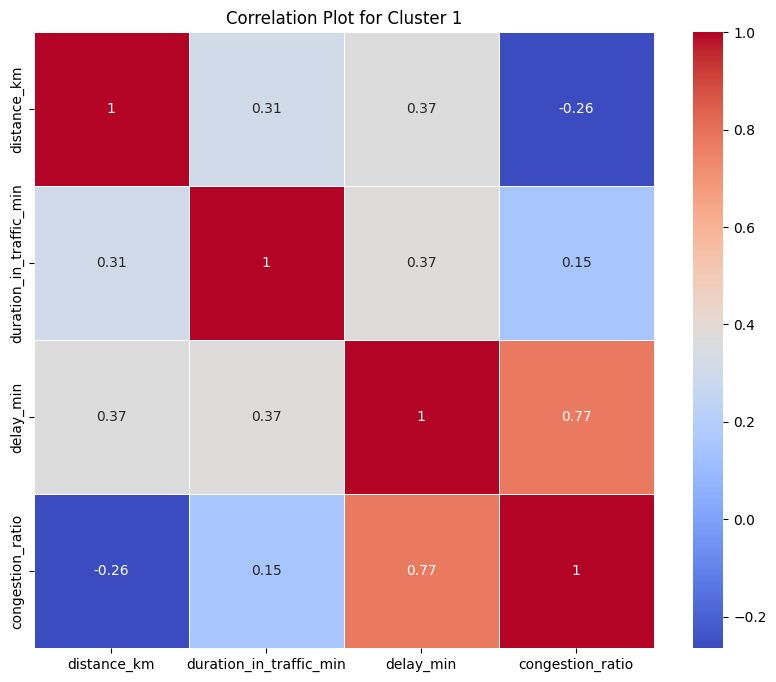

In [ ]:
# Filter data for cluster 1
cluster_data_1 = aggregation_result[aggregation_result['cluster'] == 1]

# Select numeric features for correlation in cluster 1
features_cluster_1 = cluster_data_1[['distance_km', 'duration_in_traffic_min', 'delay_min', 'congestion_ratio']]

# Create a correlation plot for cluster 1
plt.figure(figsize=(10, 8))
correlation_matrix_cluster_1 = features_cluster_1.corr()

sns.heatmap(correlation_matrix_cluster_1, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot for Cluster 1')
plt.show()


In [ ]:
features_cluster_1.describe()

,distance_km,duration_in_traffic_min,delay_min,congestion_ratio
count,44.000000,44.000000,44.000000,44.000000
mean,13.273261,19.799112,4.418208,0.337378
std,2.842750,3.527862,1.311632,0.093145
min,10.211000,12.793827,2.373000,0.169293
25%,11.262977,17.672359,3.470572,0.267580
50%,12.251540,19.366085,4.379311,0.344046
75%,14.894581,21.483030,5.267593,0.395918
max,23.308507,28.362857,7.441667,0.571949


In [ ]:
cluster_data_1.shape

(44, 9)

In [ ]:
# Display each cluster with its rows to observe the differences between clusters
cluster_data_2 = ag_df[ag_df['cluster'] == 2]
display(cluster_data_2)


,road_name,start_point,end_point,distance_km,duration_in_traffic_min,delay_min,congestion_ratio,traffic_condition,cluster
26,Discovery Blvd,"(24.7661004, 46.639909)","(24.7579988, 46.6366695)",12.274000,27.766667,12.066667,0.983108,Red,2
69,الطريق الدائري الجنوبي الفرعي,"(24.6420456, 46.8205982)","(24.5853478, 46.7106843)",13.929641,25.053623,11.311775,0.801559,Red,2
86,شارع المدينة المنورة,"(24.6637137, 46.7962236)","(24.5854047, 46.71030630000001)",16.436800,25.844902,8.924314,0.546675,Red,2


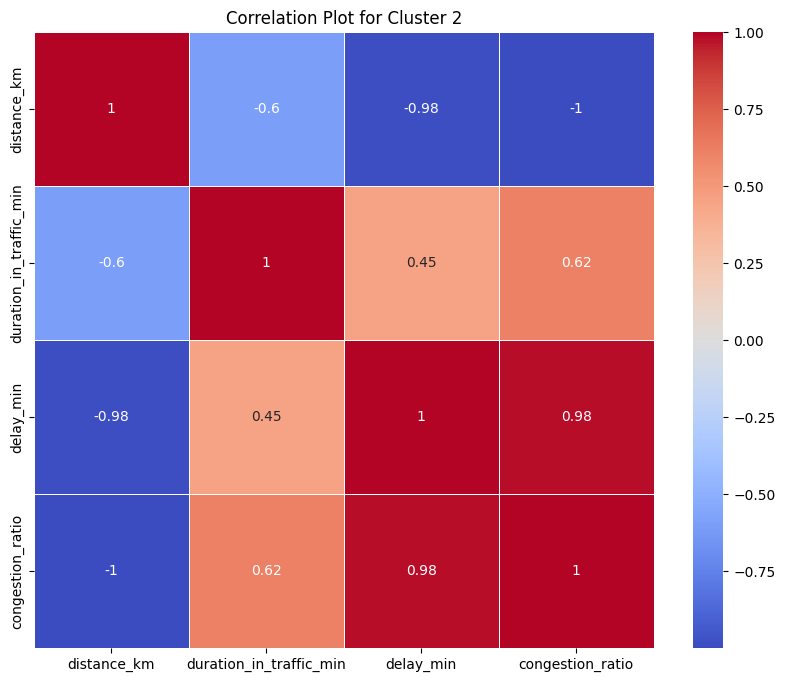

In [ ]:
# Filter data for cluster 2
cluster_data_2 = aggregation_result[aggregation_result['cluster'] == 2]

# Select numeric features for correlation in cluster 2
features_cluster_2 = cluster_data_2[['distance_km', 'duration_in_traffic_min', 'delay_min', 'congestion_ratio']]

# Create a correlation plot for cluster 2
plt.figure(figsize=(10, 8))
correlation_matrix_cluster_2 = features_cluster_2.corr()

sns.heatmap(correlation_matrix_cluster_2, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot for Cluster 2')
plt.show()


In [ ]:
features_cluster_2.describe()

,distance_km,duration_in_traffic_min,delay_min,congestion_ratio
count,3.000000,3.000000,3.000000,3.000000
mean,14.213480,26.221731,10.767585,0.777114
std,2.095865,1.395224,1.640336,0.219241
min,12.274000,25.053623,8.924314,0.546675
25%,13.101821,25.449263,10.118045,0.674117
50%,13.929641,25.844902,11.311775,0.801559
75%,15.183221,26.805784,11.689221,0.892334
max,16.436800,27.766667,12.066667,0.983108


In [ ]:
cluster_data_2.shape

(3, 9)

In [ ]:
# Display each cluster with its rows to observe the differences between clusters
cluster_data_3 = ag_df[ag_df['cluster'] == 3]
display(cluster_data_3)


,road_name,start_point,end_point,distance_km,duration_in_traffic_min,delay_min,congestion_ratio,traffic_condition,cluster
34,Jeddah Road,"(24.6942446, 46.641401)","(24.5267888, 46.438767)",31.502000,34.337879,8.671212,0.275259,Orange,3
38,King Abdul Aziz Road,"(24.9286095, 46.7150481)","(24.796827, 46.5643251)",24.584982,22.299394,3.700303,0.150545,Yellow,3
40,King Abdullah Road,"(24.8027161, 46.8191147)","(24.70444, 46.6237931)",24.651078,30.115850,7.457353,0.302503,Orange,3
44,Northern Ring Road,"(24.954535, 47.0142416)","(24.7258606, 46.583506)",55.928750,47.749008,6.142659,0.109991,Yellow,3
51,Western Ring Rd,"(24.7396285, 46.6461567)","(24.5622416, 46.5102615)",29.235000,33.171605,9.502778,0.327777,Red,3
53,أبي نصر الفارابي,"(24.6555035, 46.8913239)","(24.6407624, 46.8837473)",28.350000,31.466667,0.833333,0.029394,Blue,3
66,الشرق,"(24.9969248, 47.0206805)","(24.836873, 46.8415833)",28.750000,22.692667,2.292667,0.079745,Yellow,3
92,طريق أبي بكر الصديق,"(24.9666636, 46.7278106)","(24.796827, 46.5643251)",31.955082,32.088435,3.929252,0.122520,Yellow,3
109,ممر النظيم,"(24.9526915, 47.0585479)","(24.7888572, 46.8588979)",28.974375,32.786458,1.044792,0.036068,Blue,3


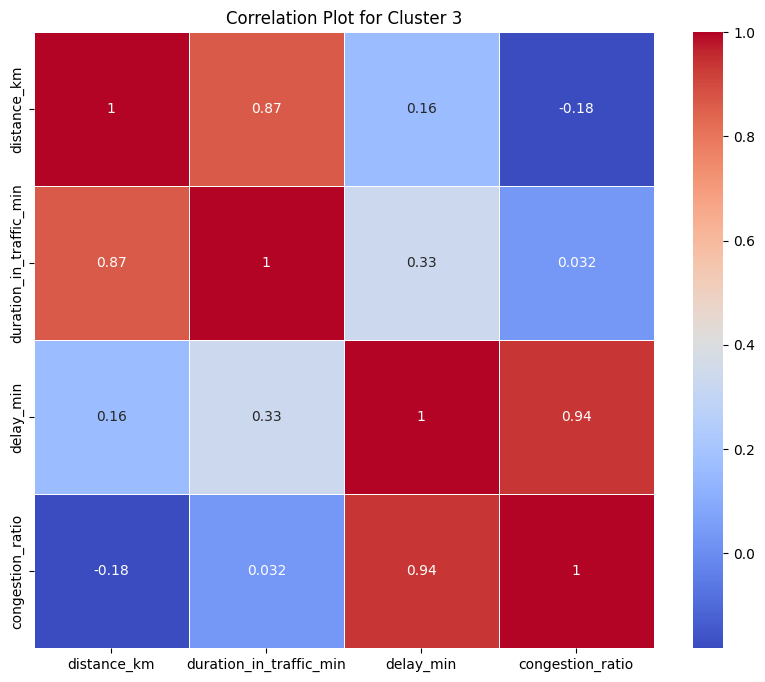

In [ ]:
# Filter data for cluster 3
cluster_data_3 = aggregation_result[aggregation_result['cluster'] == 3]

# Select numeric features for correlation in cluster 3
features_cluster_3 = cluster_data_3[['distance_km', 'duration_in_traffic_min', 'delay_min', 'congestion_ratio']]

# Create a correlation plot for cluster 3
plt.figure(figsize=(10, 8))
correlation_matrix_cluster_3 = features_cluster_3.corr()

sns.heatmap(correlation_matrix_cluster_3, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot for Cluster 3')
plt.show()


In [ ]:
features_cluster_3.describe()

,distance_km,duration_in_traffic_min,delay_min,congestion_ratio
count,9.000000,9.000000,9.000000,9.000000
mean,31.547919,31.856440,4.841594,0.159311
std,9.491243,7.415129,3.241168,0.114340
min,24.584982,22.299394,0.833333,0.029394
25%,28.350000,30.115850,2.292667,0.079745
50%,28.974375,32.088435,3.929252,0.122520
75%,31.502000,33.171605,7.457353,0.275259
max,55.928750,47.749008,9.502778,0.327777


In [ ]:
cluster_data_3.shape

(9, 9)

## clusters_3

In [ ]:
import pandas as pd

# Perform groupby with two columns ('start_point', 'end_point') and aggregate the mean of the specified columns
aggregation_result_3 = df.groupby(['road_name', 'start_point', 'end_point']).agg({
    'congestion_ratio': 'mean',
    'distance_ratio': 'mean'
}).reset_index()

# For 'traffic_condition', apply mode (most frequent value)
traffic_condition_mode = df.groupby(['start_point', 'end_point'])['traffic_condition'].agg(lambda x: x.mode()[0]).reset_index()

# Merge the mode of 'traffic_condition' back into the aggregation result
aggregation_result_3 = pd.merge(aggregation_result_3, traffic_condition_mode, on=['start_point', 'end_point'])

ag_df_3 = aggregation_result_3


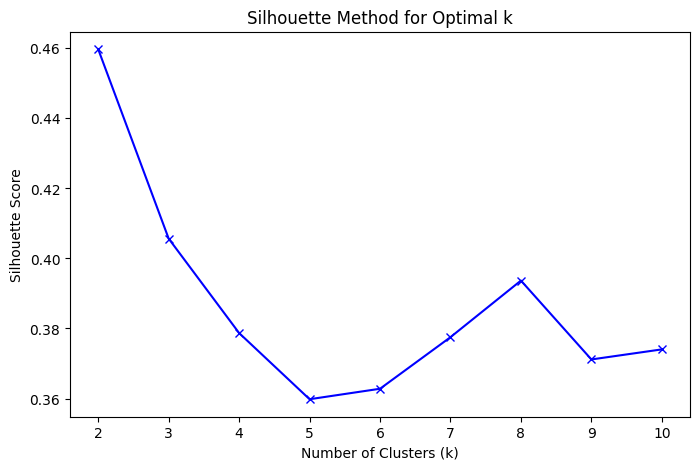

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Prepare the features for clustering from the aggregation_result (using congestion_ratio and distance_ratio)
features = aggregation_result_3[['congestion_ratio', 'distance_ratio']]

# Use the Silhouette Method to find the optimal number of clusters
silhouette_scores = []
K = range(2, 11)  # Test between 2 and 10 clusters (Silhouette score is not defined for k=1)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    labels = kmeans.labels_
    score = silhouette_score(features, labels)
    silhouette_scores.append(score)

# Plot the Silhouette Method results
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()


In [ ]:
# Prepare the features for clustering (select the specified numeric columns)
features = ag_df_3[['congestion_ratio', 'distance_ratio']]

# Use MinMaxScaler to scale the features for fair clustering
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
ag_df_3['cluster'] = kmeans.fit_predict(features_scaled)

# Display the first few rows with cluster labels
ag_df_3[['road_name', 'start_point', 'end_point', 'cluster']]

,road_name,start_point,end_point,cluster
0,AL Hadad,"(24.6927651, 46.7943949)","(24.6395493, 46.7947988)",0
1,Abi Hasain Al Hanbali,"(24.8021898, 46.66384100000001)","(24.7835076, 46.6237006)",1
2,Airport Road,"(24.8315628, 46.7228638)","(24.7686837, 46.6651902)",1
3,Airport Road,"(24.9286095, 46.7150481)","(24.8315628, 46.7228638)",0
4,Airport Road,"(24.993577, 46.7319439)","(24.9286095, 46.7150481)",0
5,Aka,"(24.693558, 46.831367)","(24.6560904, 46.7588861)",1
6,Al Abbas Al Rashidi St.,"(24.632121, 46.8075755)","(24.5901945, 46.7873646)",1
7,Al Abbas Al Rashidi St.,"(24.6923553, 46.84949959999999)","(24.632121, 46.8075755)",1
8,Al Falah,"(24.8092115, 46.7223044)","(24.7850233, 46.6956247)",1
9,Al Ghareeb,"(24.7235126, 46.7900656)","(24.6781918, 46.7491328)",1


In [ ]:
ag_df_3.shape

(114, 7)

In [ ]:
import plotly.express as px

# Create a scatter plot with Plotly
fig = px.scatter(
    ag_df_3,
    x='distance_ratio',
    y='congestion_ratio',
    color='cluster',
    hover_data=['road_name', 'start_point', 'end_point'],
    title='Clusters Based on Congestion Ratio and Distance Ratio',
    color_discrete_sequence=['blue', 'Red']  # Specify two colors for the clusters
)

# Update labels for the axes, reduce figure size, and remove the color legend (bar)
fig.update_layout(
    xaxis_title='Distance Ratio',
    yaxis_title='Congestion Ratio',
    width=600,  # Set figure width
    height=400,  # Set figure height
    coloraxis_showscale=False  # Remove the color bar next to the plot
)

# Show the interactive plot
fig.show()


In [ ]:
cluster_data_3_0 = ag_df_3[ag_df_3['cluster'] == 0]
pd.set_option('display.max_rows', None)
display(cluster_data_3_0)


,road_name,start_point,end_point,congestion_ratio,distance_ratio,traffic_condition,cluster
0,AL Hadad,"(24.6927651, 46.7943949)","(24.6395493, 46.7947988)",0.093103,1.370676,Blue,0
3,Airport Road,"(24.9286095, 46.7150481)","(24.8315628, 46.7228638)",0.075184,0.886125,Yellow,0
4,Airport Road,"(24.993577, 46.7319439)","(24.9286095, 46.7150481)",0.014745,1.644342,Blue,0
11,Al Janadriyah,"(24.9446738, 46.99754)","(24.9458889, 47.00449709999999)",0.061851,0.801684,Yellow,0
12,Al Janadriyah,"(24.9458889, 47.00449709999999)","(24.8457928, 46.8565916)",0.091602,0.712291,Yellow,0
13,Al Khozama,"(24.7363697, 46.6231491)","(24.6855349, 46.575724)",0.101356,1.327738,Blue,0
16,Al Nahdha road,"(24.6365608, 46.8002853)","(24.6250042, 46.74273400000001)",0.102787,1.323391,Yellow,0
17,Al Nahdha road,"(24.7084279, 46.7865834)","(24.6365608, 46.8002853)",0.118040,1.285778,Blue,0
19,Al Remal,"(24.9626418, 46.85121820000001)","(24.8839823, 46.8066945)",0.028641,1.048962,Blue,0
20,Al Sahel Valley,"(24.8664589, 46.8155283)","(24.8304154, 46.7925476)",0.057099,1.115861,Yellow,0


In [ ]:
cluster_data_3_0.describe()

,congestion_ratio,distance_ratio,cluster
count,64.000000,64.000000,64.0
mean,0.130278,1.152131,0.0
std,0.102874,0.233904,0.0
min,0.003178,0.699492,0.0
25%,0.049613,0.996202,0.0
50%,0.102071,1.134881,0.0
75%,0.200582,1.319181,0.0
max,0.384939,1.644342,0.0


In [ ]:
cluster_data_3_0.shape

(64, 7)

In [ ]:
cluster_data_3_1 = ag_df_3[ag_df_3['cluster'] == 1]
pd.set_option('display.max_rows', None)
display(cluster_data_3_1)


,road_name,start_point,end_point,congestion_ratio,distance_ratio,traffic_condition,cluster
1,Abi Hasain Al Hanbali,"(24.8021898, 46.66384100000001)","(24.7835076, 46.6237006)",0.001660,1.755783,Blue,1
2,Airport Road,"(24.8315628, 46.7228638)","(24.7686837, 46.6651902)",0.402131,1.221304,Orange,1
5,Aka,"(24.693558, 46.831367)","(24.6560904, 46.7588861)",0.267634,1.784742,Yellow,1
6,Al Abbas Al Rashidi St.,"(24.632121, 46.8075755)","(24.5901945, 46.7873646)",0.410242,1.630230,Yellow,1
7,Al Abbas Al Rashidi St.,"(24.6923553, 46.84949959999999)","(24.632121, 46.8075755)",0.266101,1.400531,Blue,1
8,Al Falah,"(24.8092115, 46.7223044)","(24.7850233, 46.6956247)",0.114224,1.615638,Yellow,1
9,Al Ghareeb,"(24.7235126, 46.7900656)","(24.6781918, 46.7491328)",0.114590,1.652595,Yellow,1
10,Al Jabour,"(24.6443403, 46.7653899)","(24.6118611, 46.7158466)",0.330664,2.221215,Orange,1
14,Al Muhareb,"(24.6432381, 46.7284768)","(24.5853478, 46.7106843)",0.571949,2.043216,Orange,1
15,Al Nadwah,"(24.8334879, 46.92008999999999)","(24.7888572, 46.8588979)",0.084109,2.036766,Blue,1


In [ ]:
cluster_data_3_1.shape

(50, 7)

In [ ]:
cluster_data_3_1.describe()

,congestion_ratio,distance_ratio,cluster
count,50.000000,50.000000,50.0
mean,0.323515,1.678019,1.0
std,0.176419,0.273126,0.0
min,0.001660,1.184038,1.0
25%,0.215079,1.490432,1.0
50%,0.309078,1.620462,1.0
75%,0.400570,1.784285,1.0
max,0.983108,2.527223,1.0
